# Kazakh Layouts Development

I decided to develop a Kazakh layout with the same method used for Russian.

In [9]:
from lib import Corpus, Keyboard, Layout, Result, STANDARD_KBD, STANDARD_REACH, std_key_shape, STD_EXTRA_KEYS, ERGODOX, compare
import pandas as pd

Text source: [qazcorpora.kz](https://qazcorpora.kz/).

## Position Penalties

/home/culebron/Documents/2024/keyboard/kbdopt-ru/lib.py:194: RuntimeWarning: invalid value encountered in scalar divide
  return lighten_color(scale((val - min_val) / (max_val - min_val)), lighten)


<AxesSubplot: title={'center': 'real fingers with monogram penalties'}>

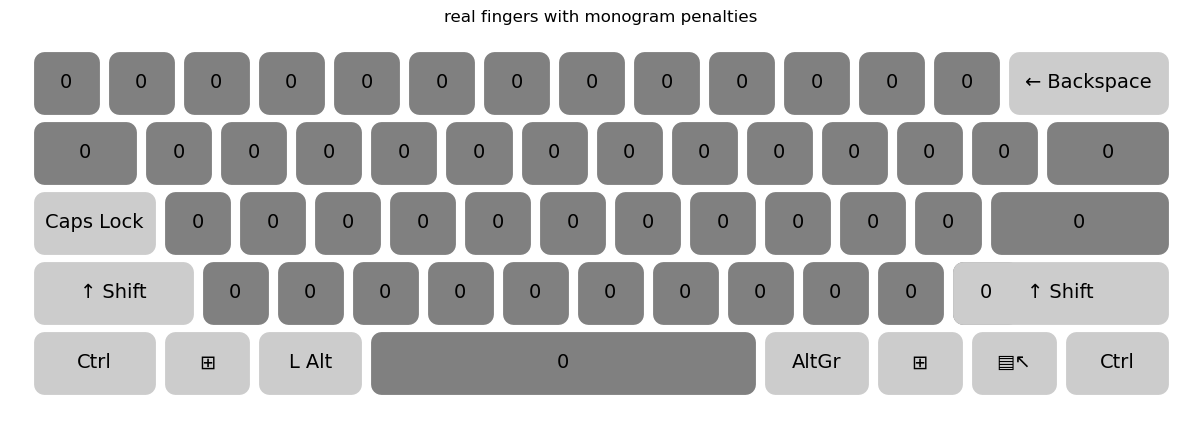

In [10]:
real_kbd = Keyboard('real fingers', ''' 
000012 3678999
000123 66789999
 abcd3 6ghij99
 01233 667899
e
''', '''
753222 6422369
422003 42002368
 10002 2000125
 12213 312213
0
''',
STANDARD_REACH, std_key_shape, STD_EXTRA_KEYS)
real_kbd.display()

In [11]:
KZ_LETTERS = {
#     'vh': 'аоыұия',
#     'vs': 'әеөіү',
#     'vf': 'эю',
    'v': 'аоыұияәеёөіүэю',
    'c': 'бвгғджзкқлмнңпрстуфхһцчшщъьй'
}
KZ = Corpus.from_path('kazak.txt', types=KZ_LETTERS)

In [12]:
# Analyzing Where Keys Gravitate to

## Inner (index finger) or outer (pinky)


In [13]:
KZ.bigrams

,bigram,num,l1,l2,t1,t2,freq
0,¶қ,92,¶,қ,-,c,0.000280
1,қа,2942,қ,а,c,v,0.008967
2,аз,1341,а,з,v,c,0.004087
3,за,943,з,а,c,v,0.002874
4,ақ,1888,а,қ,v,c,0.005754
...,...,...,...,...,...,...,...
1860,чы,1,ч,ы,c,v,0.000003
1861,тᾱ,1,т,ᾱ,c,-,0.000003
1862,ᾱн,1,ᾱ,н,-,c,0.000003
1863,63,1,6,3,-,-,0.000003


,freq_out,freq_in,outer,frequency,outerness
ү,0.121915,0.000000,-0.121915,0.121915,-10000.000000
и,35.385877,1.462982,-33.922895,36.848859,-9205.955335
а,9.356989,3.657455,-5.699534,13.014444,-4379.391101
ұ,0.457182,0.304788,-0.152394,0.761970,-2000.000000
о,4.724213,5.547140,0.822927,10.271353,801.186944
е,6.400546,14.081202,7.680655,20.481748,3750.000000
ы,0.396224,1.889685,1.493461,2.285909,6533.333333
і,0.335267,3.139316,2.804049,3.474582,8070.175439
ю,0.091436,0.883885,0.792449,0.975321,8125.000000
я,0.091436,23.864894,23.773457,23.956330,9923.664122


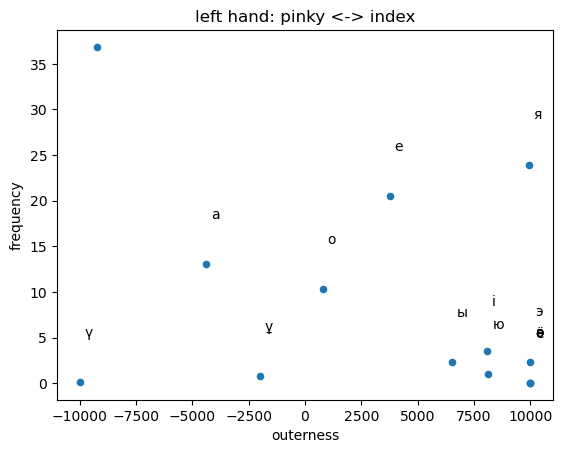

In [14]:
KZ.display_outerness("(t1 == 'v') & (t2 == 'v')", True)

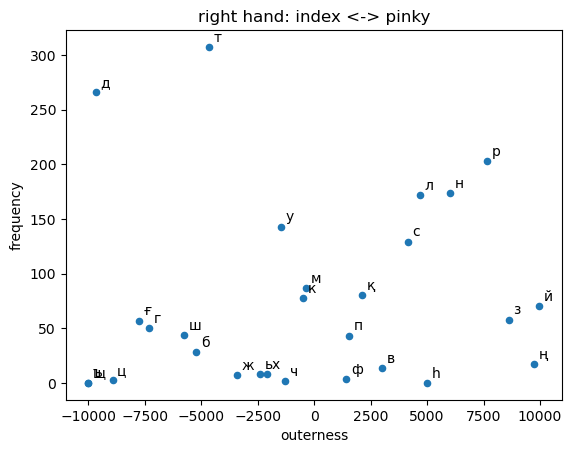

In [15]:
_ = KZ.display_outerness("(t1 == 'c') & (t2 == 'c')")

In [216]:
layouts = {
    'default': r'''
    
`12345 67890-=
→йцуке нгщшзхъ\
 фывап ролджэ¶
 ячсми тьбю.
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅∅ ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅,
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ұ∅үқё ңғ∅∅∅һ∅|
 ∅∅∅ә∅ ∅ө∅∅∅∅∅
 ∅∅∅∅і ∅∅∅∅/
∅
''',
    

    'linux': r'''
ё12345 67890-=
→йңуке нгшғзхұ\
 өықап ролджә¶
 яісми түбю.
⌴

Ё!"№;% :?*()_+
∅∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅∅ ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅,
∅

`∅∅∅∅∅ ∅∅∅∅∅∅∅
∅∅ц∅∅ё ∅∅∅щ∅һъ/
 ф∅в∅∅ ∅∅∅∅∅э∅
 ∅ч∅∅∅ ∅ь∅∅∅
∅

''',

   'ИЯБ': r'''
ц12345 67890-=
→үуғдл тқігзұф\
 хпыан рекжөв¶
 әосиб мң,.? 
⌴

∅!"№;% :?*()_+
∅∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅∅ ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

`∅∅∅∅∅ ∅∅∅∅∅∅∅
∅юь∅∅∅ ч∅∅∅щ∅ъ/
 һ∅∅я∅ ∅ё∅∅∅∅∅
 э∅шй∅ ∅∅∅∅∅
∅

''',
           
    'тест1': r'''
`12345 67890-=
→уеэюя нгцшзчф/
 ыаоий рлмсдж¶
 ъьхщв кптб.
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅∅ ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅,
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ұ∅үқё ңғ∅∅∅һ∅|
 ∅∅∅ә∅ ∅ө∅∅∅∅∅
 ∅∅∅∅і ∅∅∅∅/
∅
''',

    'тест2': r'''
`12345 67890-=
→уеэюя шнбцзчф/
 ыаоий грлмсж¶
 ъьхщв дкпт.
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅∅ ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅,
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ұ∅∅үё ∅ң∅∅∅∅∅|
 ∅ә∅і∅ ғ∅ө∅∅∅∅
 ∅∅һ∅∅ ∅қ∅∅/
∅
''',

    'тест3': r'''
ё12345 67890-=
→июяйв цдбнзчф/
 оеаы, грлмсж¶
 ъьхщэ шткпу
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅. ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

`∅∅∅∅∅ ∅∅∅∅∅∅∅
∅∅ү∅ұ∅ ∅∅∅ң∅∅∅|
 ө∅әі∅ ғ∅∅∅∅∅∅
 ∅∅һ∅∅ ∅∅қ∅∅
∅
''',
    
  'тест4': r'''
ё12345 67890-=
→юивяч бгмзжхъ/
 уеаыо ,днлрй¶
 цьщэф штксп
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅∅ .∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

`∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ү∅∅∅∅ ∅ғң∅∅һ∅|
 ұ∅әіө ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅қ∅∅
∅
''',
    

  'тест5': r'''
ё12345 67890-=
→цьовч бгмзжхъ/
 еауыю ,днлрй¶
 щэияф штксп
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅∅ .∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

`∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ө∅∅∅∅ ∅ғң∅∅һ∅|
 ∅әұіү ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅қ∅∅
∅
''',

  'тест6': r'''
ю12345 67890-=
→хоивя бгмжшзң/
 еауы, дғнлрй¶
 әұүіө птқкс
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅∅ .∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ ∅∅∅∅∅|
 э∅∅∅` ∅∅∅∅ь∅
 ∅ъ∅∅ё щч∅ц∅
∅
''',

    
  'тест7': r'''
ю12345 67890-=
→хиовя шбгмжзң/
 іыеа, ғднлрй¶
 әуұөү кқтсп
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅∅ .∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ щ∅∅∅∅∅∅|
 ∅∅э∅` ∅∅∅∅ь∅∅
 ∅∅ъё∅ ∅∅чц∅
∅
''',
    

  'тест8': r'''
ю12345 67890-=
→хиовя шгмбзңж/
 уыеа, ғднлрй¶
 әіұөү кқтсп
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅. ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ щ∅∅∅∅∅∅|
 ∅∅э∅` ∅∅∅∅∅ь∅
 ∅∅ъё∅ ∅∅чц∅
∅
''',
    

  'тест9': r'''
ю12345 67890-=
→хиовя шңқскпж/
 уыеа, ғтнлрй¶
 әіұөү гдмбз
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅. ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ щ∅∅ц∅∅∅|
 ∅ъё∅` ∅ч∅∅∅ь∅
 э∅∅∅∅ ∅∅∅∅∅
∅
''',


  'тест10': r'''
ю12345 67890-=
→хиовя шбқскпж/
 уыеа, ғтнлрй¶
 әіұөү гдмзң
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅. ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ щ∅∅ц∅∅∅|
 ∅ъё∅` ∅ч∅∅∅ь∅
 э∅∅∅∅ ∅∅∅∅∅
∅
''',


  'тест11': r'''
ю12345 67890-=
→хиовя шбқскпж/
 іыеа, ғтнлрй¶
 уұөәү гдмзң
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅. ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ щ∅∅ц∅∅∅|
 ∅ъё∅` ∅ч∅∅∅ь∅
 ∅∅∅э∅ ∅∅∅∅∅
∅
''',


  'тест12': r'''
ю12345 67890-=
→вңиоя шбқскпх/
 іыеа, ғтнлрй¶
 уұөәү гдмзж
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅. ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ щ∅∅ц∅∅∅|
 ∅ъё∅` ∅ч∅∅∅ь∅
 ∅∅∅э∅ ∅∅∅∅∅
∅
''',
    
  'тест13': r'''
ю12345 67890-=
→виүоя шбқскпх/
 іеаы, ғтнлрй¶
 ұәөуң гдмзж
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅. ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ щ∅∅ц∅∅∅|
 ∅ъё∅` ∅ч∅∅∅ь∅
 ∅∅∅э∅ ∅∅∅∅∅
∅
''',

}


In [217]:
# these keys MUST be in any layout, otherwise the code throws an exception and halts
KZ_BASE = set('`-!?%*():;.,⌴¶')
for v in KZ_LETTERS.values():
    KZ_BASE |= set(v)

res = {}
for k, l in layouts.items():
    print(k, end=': ')
    res[k] = r = Result(KZ, Layout(k, (l, real_kbd), base_keys=KZ_BASE))
    print(r.score)

default: key "/" repeated: 2
8.338606411067738
linux: key "/" repeated: 2
key "ё" repeated: 2
7.695559308574299
ИЯБ: key "/" repeated: 2
key "?" repeated: 2
11.113862986441077
тест1: key "/" repeated: 2
6.236900942441796
тест2: key "/" repeated: 2
5.594144580528095
тест3: 4.4864690696596945
тест4: 3.670759544600778
тест5: 3.6373286393468405
тест6: 3.964969508321193
тест7: 4.026327691726025
тест8: 3.8763910608547376
тест9: 3.7987566539918043
тест10: 3.6952184341409753
тест11: 3.6577121217234723
тест12: 3.700372663977827
тест13: 4.016991628183018


# Standings

In [218]:
comments = {
    'default': 'ЙЦУКЕН',
    'ИЯБ': 'A prototype from Linguistics Institute',
    'тест1': 'simple dvorak-like improvement',
    'тест2': 'simple dvorak-like improvement',
    'тест5': 'The best Russian-based layout',
    'тест11': 'The best Kazakh-based layout'
}
print(pd.DataFrame([(k, v.score.round(3), comments[k]) for k, v in res.items() if k in comments],
        columns=['layout', 'score', 'comment']).sort_values('score', ascending=True)
    .to_markdown(index=False))

| layout   |   score | comment                                |
|:---------|--------:|:---------------------------------------|
| тест5    |   3.637 | The best Russian-based layout          |
| тест11   |   3.658 | The best Kazakh-based layout           |
| тест2    |   5.594 | simple dvorak-like improvement         |
| тест1    |   6.237 | simple dvorak-like improvement         |
| default  |   8.339 | ЙЦУКЕН                                 |
| ИЯБ      |  11.114 | A prototype from Linguistics Institute |


Note: all-Russian layout looks better, because the coordination efforts of using AltGr are not accounted for. But in reality, 

In [219]:
key = 'тест13'

## Heatmap

/usr/lib/python3/dist-packages/IPython/core/events.py:82: UserWarning: Glyph 9012 (\N{COUNTERBORE}) missing from current font.
  func(*args, **kwargs)


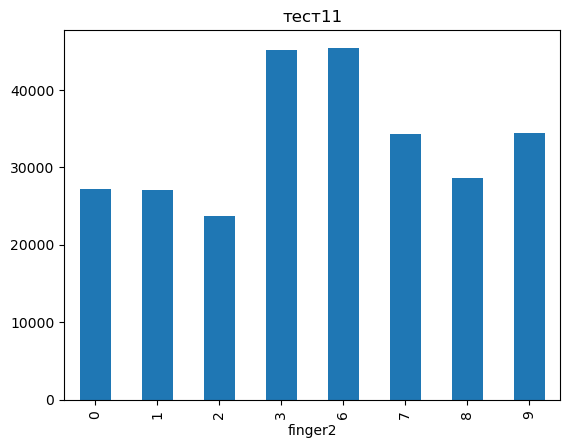

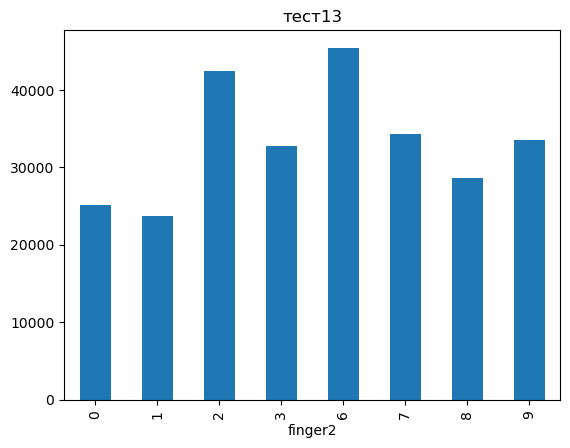

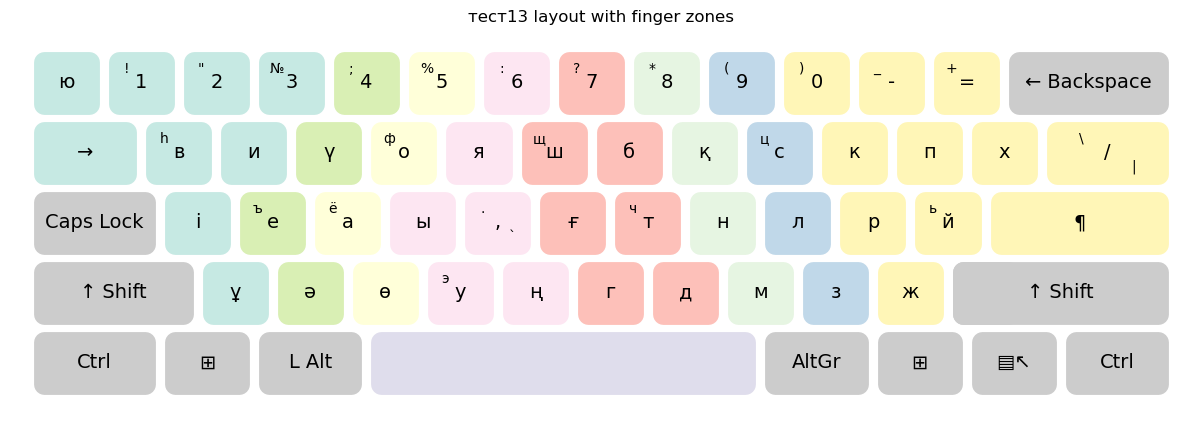

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9012 (\N{COUNTERBORE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


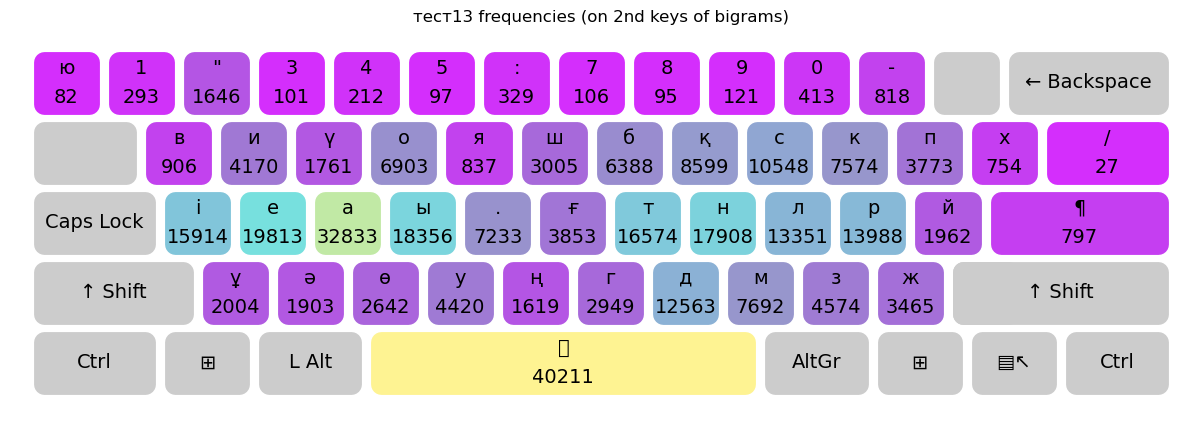

In [220]:
res['тест11'].load_bars()
res[key].load_bars()
res[key].layout.display('finger')
res[key].display('freq')

## Arrow Maps

The less arrows, the better.

Look at the arrow maps: almost all arrows are thin, and there are few of them. QWERTY has lots of thick arrows. Colemak has noteably more than Dvorak, but the score is quite ok.

I expected Colemak to have a lot of costs on the left hand, but it has more on the right.

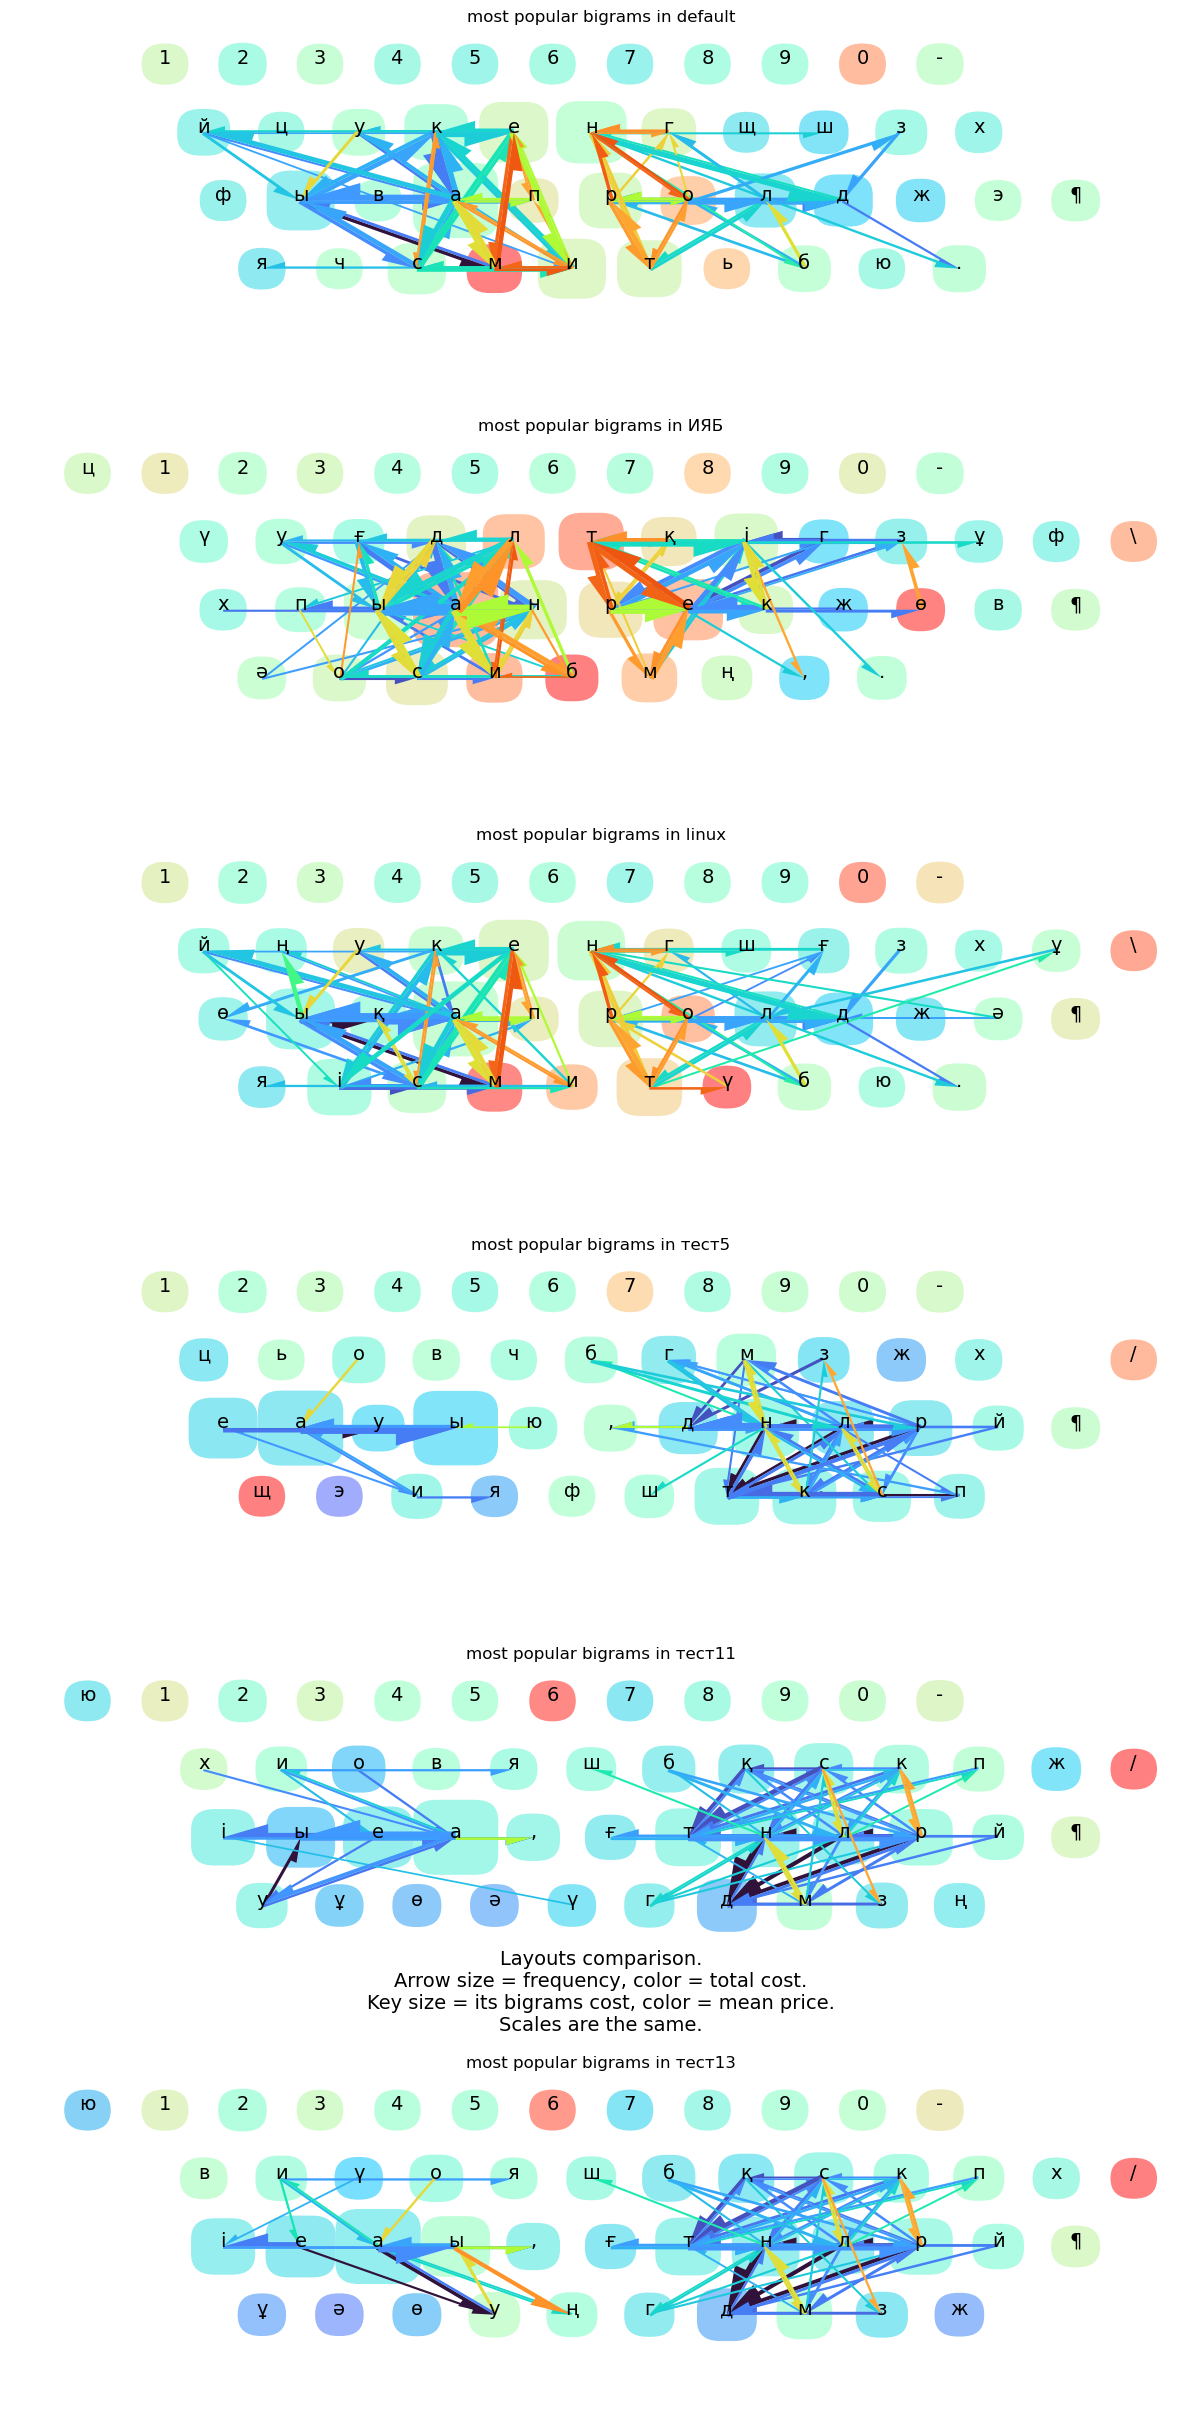

In [221]:
res['default'].combomap(res['ИЯБ'], res['linux'], res['тест5'], res['тест11'], res[key])

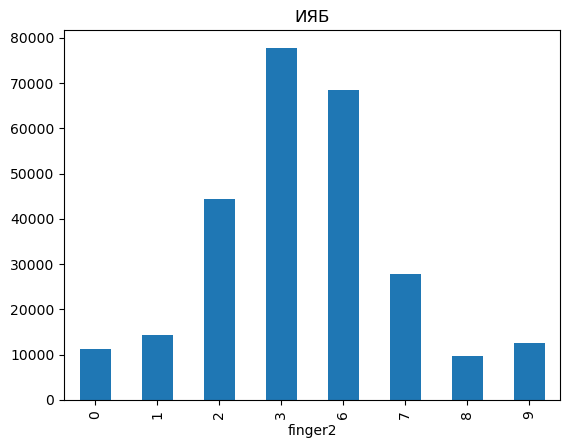

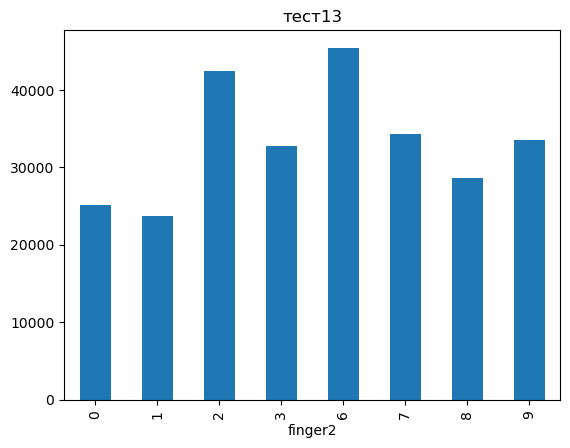

In [222]:
res['ИЯБ'].load_bars()
res[key].load_bars()

In [114]:
l = 'х'
t = 'v'
KZ.bigrams[KZ.bigrams.eval(f"((t1 == '{t}') & (l2 == '{l}')) | ((l1 == '{l}') & (t2 == '{t}'))")].sort_values('num', ascending=False)

,bigram,num,l1,l2,t1,t2,freq
56,ха,465,х,а,c,v,0.001417
223,их,171,и,х,v,c,0.000521
550,ах,97,а,х,v,c,0.000296
410,хи,85,х,и,c,v,0.000259
224,хо,50,х,о,c,v,0.000152
961,хы,39,х,ы,c,v,0.000119
786,ех,12,е,х,v,c,0.000037
1237,ох,11,о,х,v,c,0.000034
1119,ых,8,ы,х,v,c,0.000024
651,хү,6,х,ү,c,v,0.000018


In [115]:
res['тест9'].compare(res['тест11']).head(30)

,bigram,num,row_cat_old,row_cost_old,col_cat_old,col_cost_old,k2penalty_old,rollout_old,cost_old,row_cat_new,row_cost_new,col_cat_new,col_cost_new,k2penalty_new,rollout_new,cost_new,delta
1238,сз,286.333333,,1.000000,ok,0.0,0,1,1718.000000,same finger change rows,20.000000,ok,0.0,1,0,17466.333333,15748.333333
429,уі,184.333333,,1.000000,ok,0.0,1,0,737.333333,same finger change rows,10.000000,ok,0.0,0,0,5530.000000,4792.666667
1198,тб,103.333333,,1.333333,ok,0.0,1,1,826.666667,same finger change rows,15.000000,ok,0.0,2,0,4856.666667,4030.000000
587,ңк,68.333333,,0.000000,ok,0.0,2,1,341.666667,same finger change rows,20.000000,ok,0.0,2,0,4236.666667,3895.000000
531,иі,83.666667,,6.000000,ok,1.0,1,0,1757.000000,same finger change rows,20.000000,ok,1.0,0,0,5187.333333,3430.333333
410,"і""",86.333333,,6.000000,ok,1.0,3,1,2244.666667,same finger change rows,20.000000,ok,1.0,3,0,5611.666667,3367.000000
6,⌴б,2929.333333,alternating hands,0.000000,alternating or space,0.0,1,0,2929.333333,alternating hands,0.000000,alternating or space,0.0,2,0,5858.666667,2929.333333
1181,бт,53.000000,,1.333333,ok,0.0,1,0,265.000000,same finger change rows,15.000000,ok,0.0,1,0,2438.000000,2173.000000
1019,зл,48.000000,,0.000000,ok,0.0,0,0,0.000000,same finger change rows,15.000000,ok,0.0,0,0,2160.000000,2160.000000
1234,бд,30.000000,,0.666667,ok,0.0,0,0,60.000000,same finger change rows,20.000000,ok,0.0,0,0,1800.000000,1740.000000


# Gravitation to Rows

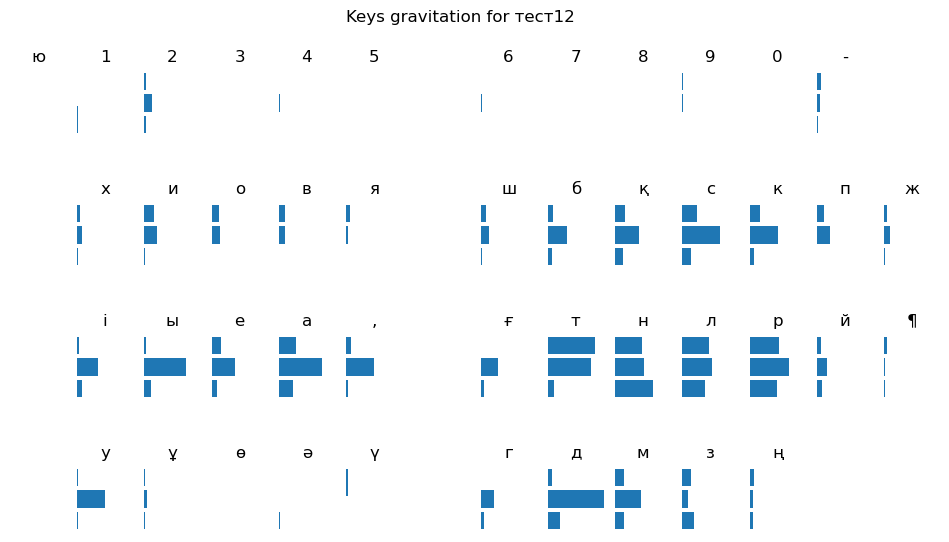

In [138]:
res[key].display('rows')

## Which side letters gravitate to

In [117]:
res['тест11'].better_side()

,l,L before,L after,L difficulty,R before,R after,R diff.,Freq-cy,Benefit if on L
0,а,4715,6176,4715,22316,21814,21814,32832,17099
26,ы,3127,1069,1069,14709,12214,12214,18356,11145
5,е,1854,3366,1854,15173,12943,12943,19813,11089
32,і,2835,1146,1146,12150,9381,9381,15914,8235
14,о,507,894,507,3439,4621,3439,6563,2932
8,и,894,1551,894,2767,2200,2200,4170,1306
40,ө,26,0,26,1279,1984,1279,2642,1253
36,ү,0,0,0,1029,1423,1029,1761,1029
37,ұ,69,192,69,976,1341,976,2004,907
39,ә,51,77,51,697,1554,697,1903,646


## Export the layout

In [27]:
res['тест11'].layout.export()


default partial alphanumeric_keys
xkb_symbols "тест11" {
	include "ru(common)"
	name[Group1]= "Culebron (тест11)";
	
	key <TLDE> { [ Cyrillic_yu, Cyrillic_YU ] };
	key <AE01> { [ 1, exclam ] };
	key <AE02> { [ 2, quotedbl ] };
	key <AE03> { [ 3, numerosign ] };
	key <AE04> { [ 4, semicolon ] };
	key <AE05> { [ 5, percent ] };
	key <AE06> { [ 6, colon ] };
	key <AE07> { [ 7, question ] };
	key <AE08> { [ 8, asterisk ] };
	key <AE09> { [ 9, parenleft ] };
	key <AE10> { [ 0, parenright ] };
	key <AE11> { [ minus, underscore ] };
	key <AE12> { [ equal, plus ] };


	key <AD01> { [ Cyrillic_ha, Cyrillic_HA, Cyrillic_shha, Cyrillic_SHHA ] };
	key <AD02> { [ Cyrillic_i, Cyrillic_I ] };
	key <AD03> { [ Cyrillic_o, Cyrillic_O ] };
	key <AD04> { [ Cyrillic_ve, Cyrillic_VE, Cyrillic_ef, Cyrillic_EF ] };
	key <AD05> { [ Cyrillic_ya, Cyrillic_YA ] };
	key <AD06> { [ Cyrillic_sha, Cyrillic_SHA, Cyrillic_shcha, Cyrillic_SHCHA ] };
	key <AD07> { [ Cyrillic_be, Cyrillic_BE ] };
	key <AD08> { [ Cyrillic

# Which side is better

/usr/lib/python3/dist-packages/IPython/core/events.py:82: UserWarning: Glyph 9012 (\N{COUNTERBORE}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9012 (\N{COUNTERBORE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


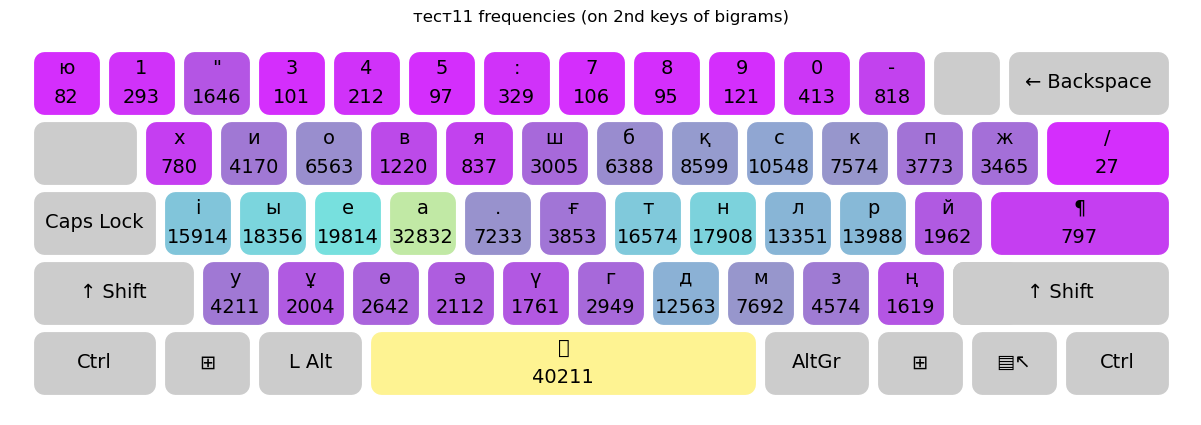

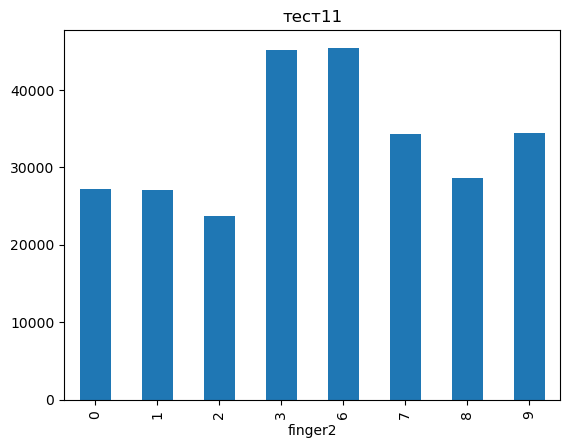

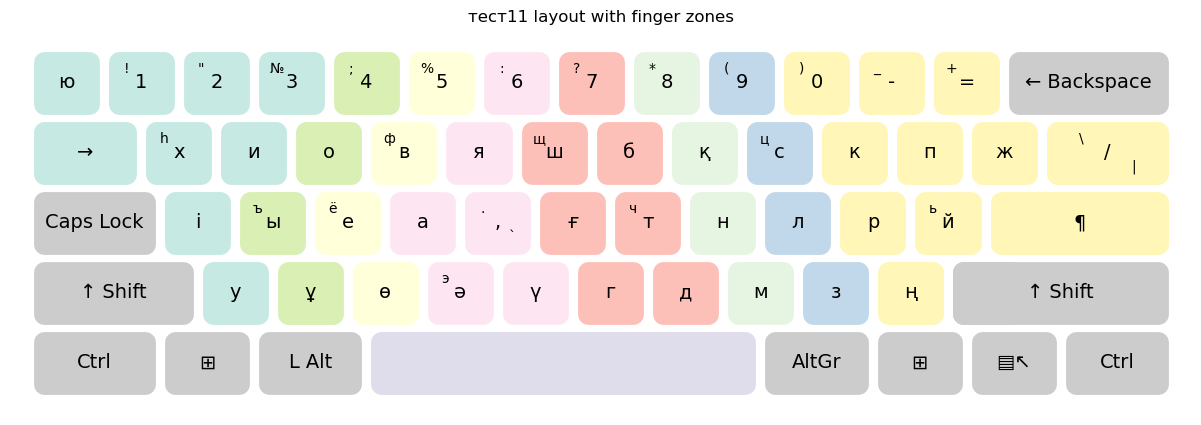

In [147]:
res['тест11'].display('num')
res['тест11'].load_bars()
res['тест11'].better_side()
res['тест11'].layout.display()